<a href="https://colab.research.google.com/github/frason88/RBI_Cash_Demand_Time-Series/blob/main/RBI_TimeSeries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:

### RBI Cash demand forecasting using time series.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import datetime
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df= pd.read_excel('RBI.xlsx')
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Value
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311


In [ ]:
df.tail()

,Value
Date,
2020-09-25,3595.76
2020-09-26,3760.84
2020-09-27,2878.27
2020-09-28,3848.13
2020-09-29,3915.17


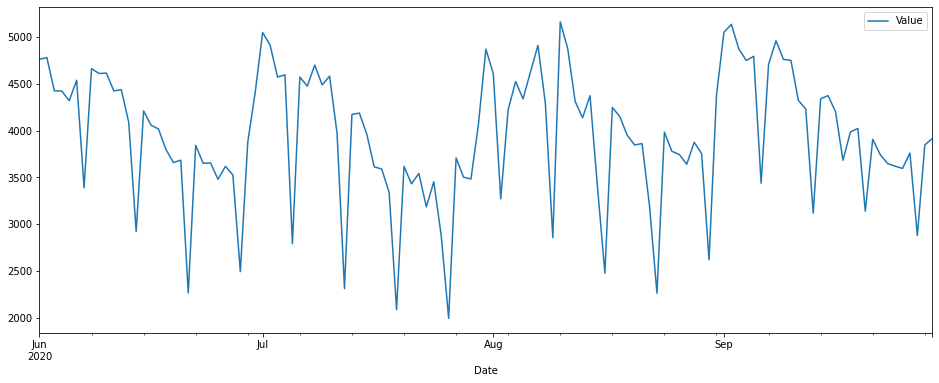

In [ ]:
#Plotting the original data
df.plot(kind= 'line', figsize=(16,6))
plt.show()

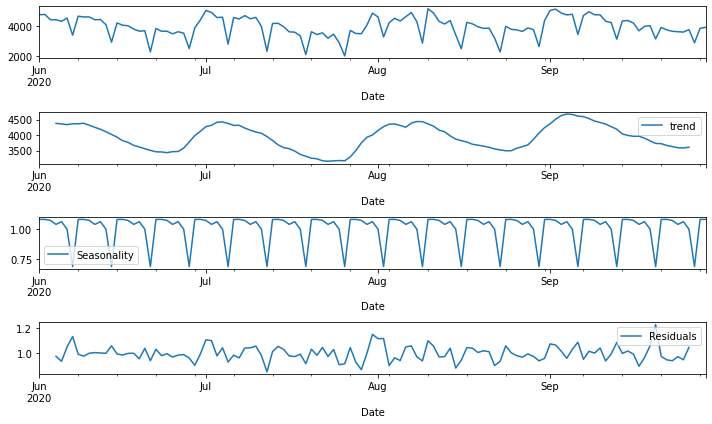

In [ ]:
#Decomposing to check the seasonality, trend and residuals

df1 = df['Value']
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(df1,model='multiplicative', freq=7) #freq

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
df1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Here we can see dual seasonality i.e, we have weekly as well as monthly seasonality. However, we see a overall constant trend.

In [ ]:
df.dtypes

Value    float64
dtype: object

In [ ]:
df.head()

,Value
Date,
2020-06-01,4764.812000
2020-06-02,4781.974663
2020-06-03,4426.915552
2020-06-04,4424.531824
2020-06-05,4321.009311


In [ ]:
df.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [ ]:
df.rename(columns={"Value":"y","Date":"ds"},inplace=True)

In [ ]:
m = Prophet(interval_width=0.95,daily_seasonality=True,yearly_seasonality=True)
model = m.fit(df_m)

In [ ]:
df.tail()

,ds,y
116,2020-09-25,3595.76
117,2020-09-26,3760.84
118,2020-09-27,2878.27
119,2020-09-28,3848.13
120,2020-09-29,3915.17


In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast.head() #yhat represent our prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-01,4654.356541,3865.370731,4944.066883,4654.356541,4654.356541,-271.631201,-271.631201,-271.631201,-417.411159,-417.411159,-417.411159,291.561152,291.561152,291.561152,-145.781194,-145.781194,-145.781194,0.0,0.0,0.0,4382.725339
1,2020-06-02,4650.647540,4030.109175,5109.051701,4650.647540,4650.647540,-82.606285,-82.606285,-82.606285,-417.411159,-417.411159,-417.411159,292.587549,292.587549,292.587549,42.217326,42.217326,42.217326,0.0,0.0,0.0,4568.041255
2,2020-06-03,4646.938538,4148.058175,5188.360271,4646.938538,4646.938538,31.701690,31.701690,31.701690,-417.411159,-417.411159,-417.411159,263.877510,263.877510,263.877510,185.235339,185.235339,185.235339,0.0,0.0,0.0,4678.640228
3,2020-06-04,4643.229537,4147.185286,5207.366048,4643.229537,4643.229537,17.615628,17.615628,17.615628,-417.411159,-417.411159,-417.411159,151.022189,151.022189,151.022189,284.004598,284.004598,284.004598,0.0,0.0,0.0,4660.845165
4,2020-06-05,4639.520536,4231.651439,5338.634084,4639.520536,4639.520536,148.580551,148.580551,148.580551,-417.411159,-417.411159,-417.411159,225.521041,225.521041,225.521041,340.470670,340.470670,340.470670,0.0,0.0,0.0,4788.101088


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-06-01,4382.725339
1,2020-06-02,4568.041255
2,2020-06-03,4678.640228
3,2020-06-04,4660.845165
4,2020-06-05,4788.101088
...,...,...
216,2021-01-03,4611.797967
217,2021-01-04,5964.481980
218,2021-01-05,5751.743300
219,2021-01-06,5452.236396


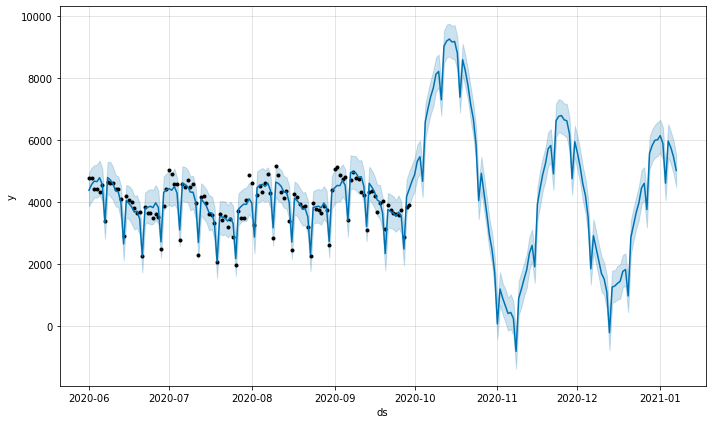

In [ ]:
#showing an upper and lower trend
plot1 = m.plot(forecast)

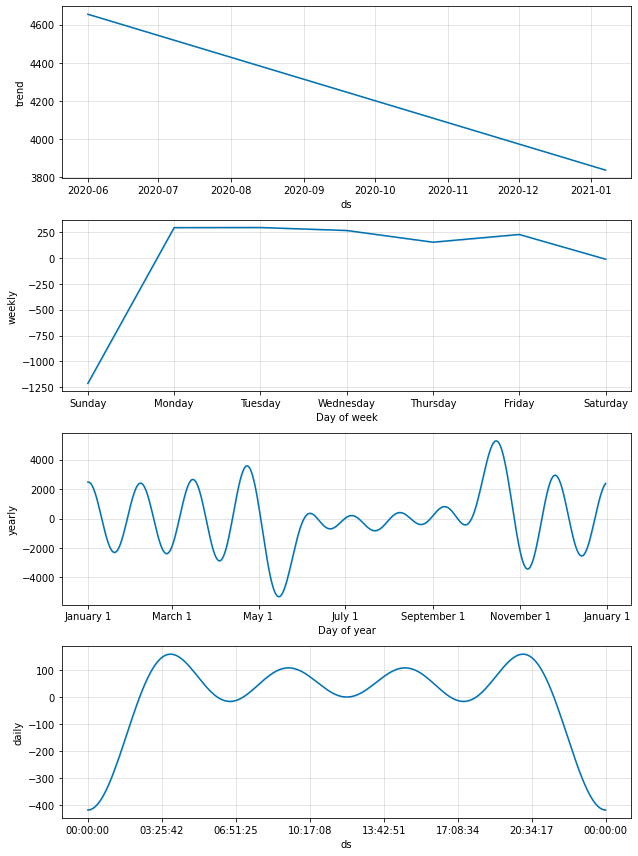

In [ ]:
#decomposing the trend (Giving More indepth seasonality)

plt2 = m.plot_components(forecast)

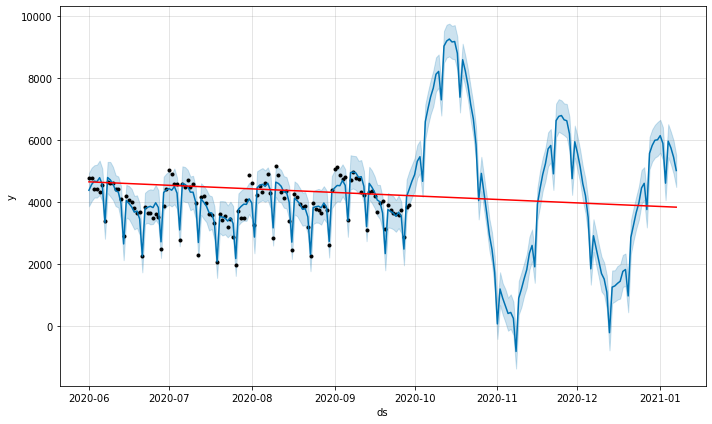

In [ ]:

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:

from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(m, forecast)
py.iplot(fig)